# Lecture du Jeu de Données

In [1]:
# importer les librairies pandas and NumPy 
import pandas as pd
import numpy as np

# lire EdStatsData.csv dans un dataframe pandas
ed_stats = pd.read_csv("EdStatsData.csv")


# Pré-Analyse
Combien de lignes et de colonnes?
Valeurs nulles?

Valider la qualité de ce jeu de données (comporte-t-il beaucoup de données manquantes, dupliquées ?)

In [2]:
# ed_stats.info() 

# combien de lignes et de colonnes? 
print("Il y a:",ed_stats.shape[0],"lignes et", ed_stats.shape[1],"colonnes dans le dataframe ed_stats.")
 
# premières lignes
# ed_stats.head() 


Il y a: 886930 lignes et 70 colonnes dans le dataframe ed_stats.


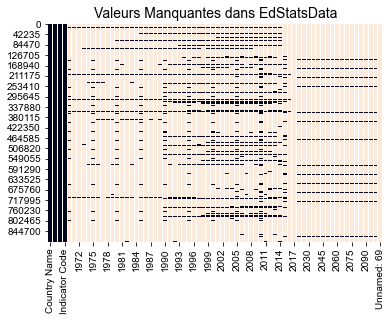

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
# heatmap des valeurs manquantes dans ed_stats, non cleané
sns_plot = sns.heatmap(ed_stats.isnull(), cbar = False)
sns.set(font_scale = 1.2)  
sns_plot.set_title('Valeurs Manquantes dans EdStatsData', fontsize = 14)
fig = sns_plot.get_figure()
plt.show()
# les valeurs manquantes sont en beige, les autres valeurs sont en noir. 

# nombre de valeurs manquantes pour chaque colonne 
missing_edstats = ed_stats.isnull().sum()
# pourcentage de valeurs manquantes dans ed_stats. 
null_counts_pct = missing_edstats / ed_stats.shape[0] * 100
# plus facile a visualiser ensemble (le nombre et le pourcentage):
nulls_df = pd.DataFrame({'null_counts': missing_edstats, 'null_pct': null_counts_pct})
# null_df.to_csv('missing_edstats1.csv'


## Explications
    
Je supprime certaines lignes, si elles correspondent à des indicateurs qui ne nous intéressent pas.  
Je regarde à nouveau les valeurs manquantes pour les indicateurs qui restent. 

In [4]:
# on regarde le nombre d'indicateurs differents
indic = ed_stats["Indicator Name"]  
indic_counts = indic.value_counts()
print("Il a",len(indic_counts),"differents indicateurs dans ed_stats.")


# je crée une copie de ed_stats pour la transformer
ed_stats2 = ed_stats

# on supprime les indicateurs qui ne nous intéressent pas, avec regex
pattern_list = [r"[Pp]roficiency", r"([Tt]heoretical)", r"[Ff]emale", 
                r"[Mm]ale", r"[Sc]cores", r"Barro-Lee", r"EGRA", r"MICS", r"PASEC",
                r"[Rr]epeaters", r"SABER"]
for p in pattern_list:
    nopat = ed_stats2["Indicator Name"].str.contains(p, na=False)
    ed_stats2 = ed_stats2[~nopat]
    

# je regarde combien d'indicateurs restent après le premier filtrage
indic2 = ed_stats2["Indicator Name"]  
indic2_counts = indic2.value_counts()
print("Il n'y a plus que", len(indic2_counts), "indicateurs.")


Il a 3665 differents indicateurs dans ed_stats.


/Applications/anaconda3/lib/python3.8/site-packages/pandas/core/strings.py:2001: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  return func(self, *args, **kwargs)


Il n'y a plus que 930 indicateurs.


In [5]:
# après le premier filtrage, les indicateurs de ed_stats2 (qui restent) dans un fichier csv 
indics_ed = ed_stats2["Indicator Name"].drop_duplicates(keep='first')
# indics_ed.to_csv('new_edstats_indics.csv') 

# je regarde à nouveau les valeurs manquantes (par année) pour choisir une année 
missing_edstats2 = ed_stats2.isnull().sum()
null_counts_pct2 = missing_edstats2 / ed_stats2.shape[0] * 100
null_df2 = pd.DataFrame({'null_counts': missing_edstats2, 'null_pct': null_counts_pct2})
# null_df2.to_csv('missing_edstats2.csv')

# En 2010 : 65.46
# En 2011 : 72.28  
# En 2012 : 73.34  
# En 2013 : 74.36  
# En 2014 : 79.92   
# En 2015 : 79.19      


## Explications

Nous allons determiner quels indicateurs nous voulons, et nous allons faire un heatmap des valeurs manquantes du dataframe pour toutes les années, et seulement les indicateurs qui nous intéressent. 

Je regarde donc les valeurs manquantes, et je vais choisir des années complémentaires à l'année principale pour importer l'information d'autres années pour compléter les valeurs manquantes. 

Je supprime les pays qui ont une population totale inférieure à 1 million d'habitants. 


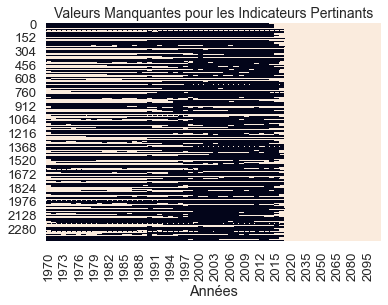

In [6]:
# pour le jeu de données avec juste les indicateurs, on regarde les valeurs manquantes
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

list_indics2 = ["Internet users (per 100 people)",
               "Population growth (annual %)",   
               "Population of the official age for primary education, both sexes (number)",
               "Population of the official age for lower secondary education, both sexes (number)",
               "Enrolment in primary education, both sexes (number)",
               "Enrolment in secondary general, both sexes (number)",
               "GDP per capita (current US$)",
               "GNI per capita, Atlas method (current US$)",
               "Expenditure on education as % of total government expenditure (%)",
               "Government expenditure on education as % of GDP (%)"]

# je filtre pour avoir juste les indicateurs dans la liste
fil_ed_stats = ed_stats2[ed_stats2["Indicator Name"].isin(list_indics2)]
fil_ed_stats.reset_index(inplace=True)
# fil_ed_stats.to_csv('fil_ed_stats.csv')

# heatmap des valeurs manquantes pour les indicateurs choisis
sns_plot = sns.heatmap(fil_ed_stats.iloc[:,5:].isnull(), cbar=False)
sns_plot.set_title('Valeurs Manquantes pour les Indicateurs Pertinants', fontsize = 14)
sns_plot.set(xlabel = "Années")
#sns_plot.set(ylabel = "Indicateurs Par Pays")
plt.setp(sns_plot.xaxis.get_majorticklabels(), rotation=90) 
sns.set(font_scale = 1.2)  
# les valeurs manquantes sont en beige, les autres valeurs sont en noir. 
plt.show()
fig2 = sns_plot.get_figure()

# fichier csv des valeurs manquantes par année, pour nos 10 indicateurs
missing_fil_edstats = fil_ed_stats.isnull().sum()
null_counts_pct3 = missing_fil_edstats / fil_ed_stats.shape[0] * 100
null_df3 = pd.DataFrame({'null_counts': missing_fil_edstats, 'null_pct': null_counts_pct3})
# null_df3.to_csv('missing_edstats3.csv')
# En 2010 :  18.51
# En 2011 :  18.34
# En 2012 :  19.29
# En 2013 :  19.62
# En 2014 :  22.97
# En 2015 :  31.57
# En 2016 :  50.12

# En 2017 - 2100 :   100 


In [7]:
# je fais pivoter la table, pour l'année 2016
piv_edstats2016 = ed_stats2.pivot_table(index=["Country Name"], columns=['Indicator Name'], values="2016", 
                                       margins=True, dropna=False)
piv_edstats2016.reset_index(inplace=True)


# regarder quelles colonnes (indicateurs) sont les plus complètes, et créer un fichier csv pour
# l'inspecter manuellement, pour valider notre choix des indicateurs 
vals_pos = piv_edstats2016.notnull().sum().sort_values(ascending=False)
#print("Les indicateurs avec le plus de valeurs sont: ", vals_pos.head(10))
#vals_pos.to_csv('mostcompleted.csv')

# liste des indicateurs qui sont pertinents pour notre problématique & on garde le nom des pays
list_indics = ["Country Name",
               "Internet users (per 100 people)",
               "Population, total",
               "Population growth (annual %)",   
               "Population of the official age for primary education, both sexes (number)",
               "Population of the official age for lower secondary education, both sexes (number)",
               "Enrolment in primary education, both sexes (number)",
               "Enrolment in secondary general, both sexes (number)",
               "GDP per capita (current US$)",
               "GNI per capita, Atlas method (current US$)",
               "Expenditure on education as % of total government expenditure (%)",
               "Government expenditure on education as % of GDP (%)"]

# dataframe avec juste les indicateurs qui nous intéressent 
indics_df2016 = piv_edstats2016[list_indics]

# on supprime les pays dont la population totale est moins de 1 000 000
indics_df2016 = indics_df2016[indics_df2016["Population, total"] >= 1000000]
indics_df2016 = indics_df2016.drop("Population, total", axis=1)
# indics_df2016.to_csv('indics_df2016.csv')


In [8]:
# fonction pour pivoter la table pour une année specifique, et obtenir le dataframe avec juste les indicateurs 
# que nous avons choisis
# on supprime les pays qui ont une population totale de moins d'un million d'hab
def pivot_year(year, list_indics_input, name_csv):
    piv_edstats = ed_stats2.pivot_table(index=["Country Name"], columns=['Indicator Name'], values=year, 
                                       margins=True, dropna=False)
    piv_edstats.reset_index(inplace=True)
    indics_df = piv_edstats[list_indics_input]
    
    indics_df = indics_df[indics_df["Population, total"] >= 1000000]
    indics_df = indics_df.drop("Population, total", axis=1)
    # indics_df.to_csv('{}.csv'.format(name_csv))
    
    return indics_df


In [9]:
indics_df2015 = pivot_year("2015", list_indics, 'indics_df2015.csv')

indics_df2014 = pivot_year("2014", list_indics, 'indics_df2014.csv')

indics_df2013 = pivot_year("2013", list_indics, 'indics_df2013.csv')


## Explications

Dans la cellule ci dessous, on utilise un nouveau fichier csv, celui avec le jeu de données sur les pays EdStatsCountry. 
On sépare le jeu de données par regions, avec des dictionnaires.

D'autre part, on crée un Dataframe avec les valeurs des indicateurs pour les regions en général. 


In [10]:
# importer EdStatsData.csv dans pandas 
ed_countries = pd.read_csv("EdStatsCountry.csv")

ed_regions = ed_countries["Region"].value_counts()
# liste des regions possible: regions_interest
regions_interest = list(ed_regions.index)
print(regions_interest)


# créer un dictionnaire, clé: regions, valeurs: noms des pays
countries_extract = {}
for reg in regions_interest:
    countries = ed_countries[ed_countries["Region"] == reg]
    countries_extract[reg] = countries["Table Name"]
    
    
# dictionnaire avec clé: regions, valeurs: toute l'information contenue dans le dataframe indics_df qui correspondent 
# à cette region
countries_holder2016 = {}
for keys,values in countries_extract.items():
    countries_holder2016[keys] = indics_df2016[indics_df2016["Country Name"].isin(countries_extract[keys])]


['Europe & Central Asia', 'Sub-Saharan Africa', 'Latin America & Caribbean', 'East Asia & Pacific', 'Middle East & North Africa', 'South Asia', 'North America']


In [11]:
# filtrer le dataframe pour avoir juste les regions et leurs valeurs correspondantes (sans avoir chaque pays)
indics_regs2016 = indics_df2016[indics_df2016["Country Name"].isin(regions_interest)]
indics_regs2016.reset_index(inplace=True)

# filtrer le dataframe pour avoir juste les regions et leurs valeurs correspondantes (sans avoir chaque pays)
# pour les autres années aussi 
# en réalité nous n'allons pas utliser ces dataframes, car nous allons imputer les valeurs des regions avec la 
# somme / la moyenne des pays de la region
indics_regs2015 = indics_df2015[indics_df2015["Country Name"].isin(regions_interest)]
indics_regs2015.reset_index(inplace=True)

indics_regs2014 = indics_df2014[indics_df2013["Country Name"].isin(regions_interest)]
indics_regs2014.reset_index(inplace=True)

indics_regs2013 = indics_df2014[indics_df2013["Country Name"].isin(regions_interest)]
indics_regs2013.reset_index(inplace=True)


<ipython-input-11-ce21082b9982>:12: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  indics_regs2014 = indics_df2014[indics_df2013["Country Name"].isin(regions_interest)]
<ipython-input-11-ce21082b9982>:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  indics_regs2013 = indics_df2014[indics_df2013["Country Name"].isin(regions_interest)]


## Explications:

Comme pour 2016, je sépare le jeu de données par regions dans des dictionnaires, pour 2015, 2014, 2013. 

In [12]:
def extract_regions(indic_df, countries_holder_name):
    
    countries_holder_name = {}
    
    # clé: regions, valeurs: toutes les valeurs dans le dataframe indics_df qui correspondent à cette region
    for keys,values in countries_extract.items():
        countries_holder_name[keys] = indic_df[indic_df["Country Name"].isin(countries_extract[keys])]
    
    return countries_holder_name
    

In [13]:

countries_holder2015 = extract_regions(indics_df2015, "countries_holder2015")

countries_holder2014 = extract_regions(indics_df2014, "countries_holder2014")

countries_holder2013 = extract_regions(indics_df2013, "countries_holder2013")


## Explications:
Imputer les valeurs manquantes par des valeurs d'années précédentes proches. 
Pour 2016: on utlitise 2015, 2014, 2013


In [14]:
def update_dataframes(df, df2015, df2014, df2013, name_csv, reg_name):
    print(df.shape)
    # valeurs nulles dans le dataframe 2016, et les remplacer par les valueurs pour les années
    # proches 
    df = df.mask(df.isnull(),df2015)  
    df = df.mask(df.isnull(),df2014)  
    df = df.mask(df.isnull(),df2013)  
    
    # supprimer le pays si il ne présente pas au moins 6 valeurs non nulles, après imputation
    df = df.dropna(thresh=6)
    
    df = df.assign(Region = reg_name)
    
    # df.to_csv('{}.csv'.format(name_csv))
    print(df.shape)
    
    return df
    

In [15]:
# imputer pour chaque region, grâce à la fonction update_dataframes 
# crée au dessus
east_asia_pacif2 = update_dataframes(countries_holder2016["East Asia & Pacific"],
                                    countries_holder2015["East Asia & Pacific"],
                                    countries_holder2014["East Asia & Pacific"],
                                    countries_holder2013["East Asia & Pacific"],
                                    "east_asia_pacif2", "East Asia & Pacific")


europ_centr_asia2 = update_dataframes(countries_holder2016["Europe & Central Asia"],
                                      countries_holder2015["Europe & Central Asia"], 
                                      countries_holder2014["Europe & Central Asia"],
                                      countries_holder2013["Europe & Central Asia"],
                                      "europ_centr_asia2", "Europe & Central Asia")


lat_americ_carib2 = update_dataframes(countries_holder2016["Latin America & Caribbean"],
                                      countries_holder2015["Latin America & Caribbean"],
                                      countries_holder2014["Latin America & Caribbean"],
                                      countries_holder2013["Latin America & Caribbean"],
                                      "lat_americ_carib2", "Latin America & Caribbean")
# on supprime Venezuela car les valeurs sont les meilleures de la region mais
# elles ne sont plus pertinantes 
lat_americ_carib2 = lat_americ_carib2[lat_americ_carib2["Country Name"] != "Venezuela, RB"]



north_americ2 = update_dataframes(countries_holder2016["North America"],
                                  countries_holder2015["North America"],
                                  countries_holder2014["North America"],
                                  countries_holder2013["North America"],
                                  "north_americ2", "North America")


south_asia2 = update_dataframes(countries_holder2016['South Asia'],
                               countries_holder2015['South Asia'],
                               countries_holder2014['South Asia'],
                               countries_holder2013['South Asia'],
                               "south_asia2", 'South Asia')

subsah_africa2 = update_dataframes(countries_holder2016["Sub-Saharan Africa"],
                                   countries_holder2015["Sub-Saharan Africa"],
                                   countries_holder2014["Sub-Saharan Africa"],
                                   countries_holder2013["Sub-Saharan Africa"],
                                   "subsah_africa2", "Sub-Saharan Africa")

mid_east_north_afric2 = update_dataframes(countries_holder2016["Middle East & North Africa"],
                                          countries_holder2015["Middle East & North Africa"],
                                          countries_holder2014["Middle East & North Africa"],
                                          countries_holder2013["Middle East & North Africa"],
                                          "mid_east_north_afric2", "Middle East & North Africa")


(18, 11)
(18, 12)
(46, 11)
(45, 12)
(23, 11)
(23, 12)
(2, 11)
(2, 12)
(6, 11)
(6, 12)
(41, 11)
(41, 12)
(19, 11)
(18, 12)


In [16]:
# imputer certaines valeurs manuellement, sinon la prochaine étape donne des valeurs un peu erronées

# imputation manuelle
east_asia_pacif2.loc[94,"Population of the official age for primary education, both sexes (number)"] = east_asia_pacif2.loc[116,"Population of the official age for primary education, both sexes (number)"]

# imputation manuelle de certaines valeurs pour Singapore (population) 
sing_cols = ["Population of the official age for primary education, both sexes (number)",
             "Population of the official age for lower secondary education, both sexes (number)",
             "Enrolment in primary education, both sexes (number)",
             "Enrolment in secondary general, both sexes (number)"]

east_asia_pacif2.loc[190,sing_cols] = east_asia_pacif2.loc[94,sing_cols]


# imputation manuelle de certaines valeurs pour Trinidad and Tobago (population) 
lat_americ_carib2.loc[219,"Enrolment in primary education, both sexes (number)"] = 100000
lat_americ_carib2.loc[219, "Enrolment in secondary general, both sexes (number)"] = 100000

# imputation manuelle
lat_americ_carib2.loc[142, "Enrolment in secondary general, both sexes (number)"] = 17000000


In [17]:
from sklearn.impute import KNNImputer

# les valeurs sont distribuées dans l'espace et ont des voisins
def KNN_imputation(df, columns):
    knn_imputer = KNNImputer(n_neighbors = 5, weights = "uniform")
    for column in columns:
        df[column] = knn_imputer.fit_transform(df[[column]])
    return df

# columns est la liste des colonnes que je veux imputer 
# n_neighbors est le nombre voisins que je regarde (et donc sur lesquels je fais la moyenne) 
# pour imputer ma valeur. 


In [18]:
east_asia_pacif3 = KNN_imputation(east_asia_pacif2, east_asia_pacif2.columns[1:-1])
# east_asia_pacif3.to_csv("east_asia_pacif3.csv")

lat_americ_carib3 = KNN_imputation(lat_americ_carib2, lat_americ_carib2.columns[1:-1])

europ_centr_asia3 = KNN_imputation(europ_centr_asia2, europ_centr_asia2.columns[1:-1])

subsah_africa3 = KNN_imputation(subsah_africa2, subsah_africa2.columns[1:-1])

north_americ3 = KNN_imputation(north_americ2, north_americ2.columns[1:-1])
# north_americ3.to_csv('north_americ3.csv')


## Explications:
Je compare les régions grâce aux boxplots (en utilisant les valeurs des pays qui leur correspondent). 

J'écris ensuite 2 fonctions, pour imputer les valeurs des regions grâce aux pays de ces regions (par 
la moyenne, ou la somme, dans le cas d'indicateurs de population)


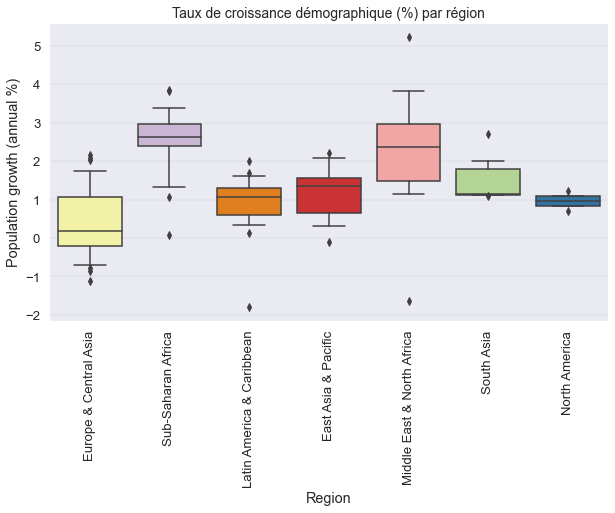

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# 2 dataframes pour les graphiques, le 1er dataframe avec toutes les regions du monde
# le 2eme dataframe avec seulement certaines régions que l'on va vouloir comparer à part
my_regions2 = pd.concat([europ_centr_asia3, subsah_africa3, lat_americ_carib3, east_asia_pacif3, 
                         mid_east_north_afric2, south_asia2, north_americ3])

my_regions4 = pd.concat([europ_centr_asia3, subsah_africa3, lat_americ_carib3, mid_east_north_afric2])


fig, axes = plt.subplots(figsize=[10,3]) 

def plot_regions(Indicator, place1, place2):
    sns.set(style="whitegrid")
    # ax=axes[place1, place2]
    sns_plot2 = sns.boxplot(data = my_regions2, x= "Region", y=Indicator, 
                            whis=[5, 95], palette="Paired_r")

    for item in sns_plot2.get_xticklabels():
        item.set_rotation(90)

    sns_plot2.spines['top'].set_visible(False)
    sns_plot2.spines['right'].set_visible(False)
    sns_plot2.spines['left'].set_visible(False)
    # supprimer y-axis tick marks
    sns_plot2.yaxis.set_ticks_position('none')
    # rajouter major gridlines y-axis
    sns_plot2.grid(color='grey', axis='y', linestyle='-', linewidth=0.25, alpha=0.5)
    sns.set(font_scale= 1.1)  
    
    return sns_plot2
    
#sns_plot2 = plot_regions("Internet users (per 100 people)", 0, 0)
#sns_plot2.set_title('Utilisateurs d\'internet (par 100 personnes) par région', fontsize = 14)

sns_plot3 = plot_regions("Population growth (annual %)", 0, 1)
sns_plot3.set_title('Taux de croissance démographique (%) par région', fontsize = 14)

#sns_plot5 = plot_regions("Population of the official age for lower secondary education, both sexes (number)",1,0)
#sns_plot5.set_title("Population en âge officiel de l'enseignement secondaire par région", fontsize = 14)

#sns_plot4 = plot_regions("GDP per capita (current US$)", 0,0)
#sns_plot4.set_title("PIB par habitant (US$), par région", fontsize = 14)

#sns_plot6 = plot_regions("Expenditure on education as % of total government expenditure (%)",1,0)
#sns_plot6.set_title("Dépenses en éducation (en % des dépenses publiques totales), par région", fontsize = 14)

plt.subplots_adjust(top=1.5)

plt.show()
                  

In [20]:
# fonction pour imputer avec la moyenne
def impute_vals(keys_dict, vals_dict, dataframe, Indicator):
    
    manual_mean = vals_dict[Indicator].mean()
    
    # on insère la valeur dans notre dataframe
    dataframe.loc[dataframe['Country Name'] == keys_dict,Indicator] = manual_mean
    
    return dataframe
    

In [21]:
# fonction pour imputer avec la somme
def impute_vals_sum(keys_dict, vals_dict, dataframe, Indicator):
    
    manual_sum = vals_dict[Indicator].sum()
    
    # on insère la valeur dans notre dataframe
    dataframe.loc[dataframe['Country Name'] == keys_dict,Indicator] = manual_sum
    
    return dataframe

In [22]:
# imputer les valeurs, en utilisant les valeurs pour les pays de cette region
regionsdict4 = {"Europe & Central Asia": europ_centr_asia3,"Sub-Saharan Africa": subsah_africa3,
               "Latin America & Caribbean": lat_americ_carib3, "East Asia & Pacific": east_asia_pacif3,
               "Middle East & North Africa": mid_east_north_afric2, "South Asia": south_asia2,
               "North America": north_americ3}
 

for keys,vals in regionsdict4.items():
    
    # je prends la somme quand l'indicateur décrit la population
    # indics_regs2016 est le dataframe qui contient juste les regions sans les pays spécifiques
    indics_regs2016 = impute_vals_sum(keys, vals, indics_regs2016,
                "Population of the official age for primary education, both sexes (number)")
    
    indics_regs2016  = impute_vals_sum(keys, vals, indics_regs2016,
                               "Population of the official age for lower secondary education, both sexes (number)")
        
    indics_regs2016  = impute_vals_sum(keys, vals, indics_regs2016,
                "Enrolment in primary education, both sexes (number)")
    
    indics_regs2016  = impute_vals_sum(keys, vals, indics_regs2016, "Enrolment in secondary general, both sexes (number)")
    
    indics_regs2016  = impute_vals(keys, vals, indics_regs2016,
                               "Expenditure on education as % of total government expenditure (%)")
    
    indics_regs2016  = impute_vals(keys, vals, indics_regs2016, "Government expenditure on education as % of GDP (%)")
    

/Applications/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1765: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)


In [23]:
# confirmer qu'il n'y a plus de valeurs manquantes pour les regions "2016"
missing_edstats3 = indics_regs2016.isnull().sum()
null_counts_pct3 = missing_edstats3 / indics_regs2016.shape[0] * 100
null_df3= pd.DataFrame({'null_counts': missing_edstats3, 'null_pct': null_counts_pct3})
# null_df3.to_csv('missing_edstats3.csv')


## Explications
Maintenant je fais le scoring, pour avoir ensuite un classement. J'ai vérifié qu'il n'y pas de valeurs manquantes. 


In [24]:
# copie du dataframe completé (avec valeurs imputées)
indics_regs3 = indics_regs2016
print(indics_regs3.shape)


# dataframe vide avec les mêmes indexes que le dataframe indics_regs3 (dataframe avec les 
# indicateurs pour chaque region)
quantiles_life = pd.DataFrame().reindex_like(indics_regs3)
quantiles_life["Country Name"] = indics_regs3["Country Name"]
quantiles_life["index"] = indics_regs3["index"]

# créer une liste avec juste les noms des indicateurs
num_cols = indics_regs3.columns[2:]
# boucle avec les colonnes de indics_regs3 
for cols in num_cols:
    quantiles_life[cols] = pd.qcut(x = indics_regs3[cols], q = 5, precision= 0)

# ascending = False / croissant = False 
# donc classés de façon décroissante 
ranks2 = quantiles_life[num_cols].rank(axis= 0)
    
# coefficients différents pour certains indicateurs
ranks2.iloc[:,0] *= 3
ranks2.iloc[:,-4:-2] *= 2
ranks_vals = ranks2.sum(axis = 1)

ranks2 = ranks2.assign(Scores = list(ranks_vals))
ranks2 = ranks2.sort_values(by = "Scores", ascending = False)

indics_regs3 = indics_regs3.assign(Scores = list(ranks_vals))
indics_regs3 = indics_regs3.sort_values(by = "Scores", ascending = False)
indics_regs3

(7, 12)


Indicator Name,index,Country Name,Internet users (per 100 people),Population growth (annual %),"Population of the official age for primary education, both sexes (number)","Population of the official age for lower secondary education, both sexes (number)","Enrolment in primary education, both sexes (number)","Enrolment in secondary general, both sexes (number)",GDP per capita (current US$),"GNI per capita, Atlas method (current US$)",Expenditure on education as % of total government expenditure (%),Government expenditure on education as % of GDP (%),Scores
0,58,East Asia & Pacific,52.796321,0.683098,1.710996e+08,8.763133e+07,1.875838e+08,1.365300e+08,9787.775545,9857.964552,15.555638,4.442995,68.5
1,68,Europe & Central Asia,73.914751,0.503675,5.135307e+07,4.091034e+07,4.976377e+07,5.953513e+07,22230.203651,23136.346469,12.165424,5.129433,66.5
4,163,North America,77.540410,0.747962,2.710771e+07,1.347117e+07,2.699183e+07,2.680780e+07,56081.944482,55493.978084,14.548200,5.380780,65.0
2,117,Latin America & Caribbean,56.373113,1.046807,5.845067e+07,3.427754e+07,6.649281e+07,7.198890e+07,8311.370178,8259.587996,18.276502,5.262284,64.0
5,197,South Asia,26.466113,1.272381,1.753376e+08,1.033598e+08,1.898094e+08,1.619048e+08,1637.515774,1610.656074,13.611372,2.937377,46.0
6,205,Sub-Saharan Africa,19.998498,2.738279,1.621203e+08,7.179956e+07,1.731265e+08,6.434096e+07,1464.124539,1516.069228,17.537308,4.388415,45.5
3,144,Middle East & North Africa,47.621417,1.808786,4.583603e+07,2.149456e+07,4.126238e+07,2.925544e+07,7200.935364,7654.340579,12.151762,3.402203,36.5


## Graphique Bar Plot

Text(0.5, 0, 'Région')

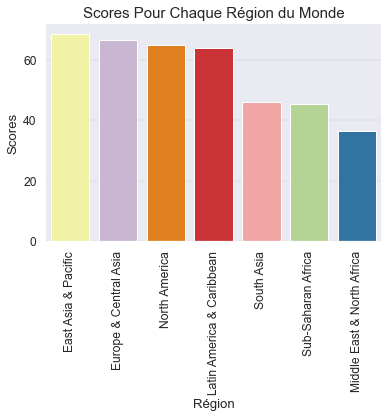

In [25]:

sns_plot = sns.barplot(data = indics_regs3, x= "Country Name", y="Scores", palette="Paired_r")

for item in sns_plot.get_xticklabels():
    item.set_rotation(90)

sns_plot.spines['top'].set_visible(False)
sns_plot.spines['right'].set_visible(False)
sns_plot.spines['left'].set_visible(False)
# supprimer y-axis tick marks
sns_plot.yaxis.set_ticks_position('none')
# rajouter major gridlines y-axis
sns_plot.grid(color='grey', axis='y', linestyle='-', linewidth=0.25, alpha=0.5)
sns.set(font_scale= 1.3)  
sns_plot.set_title("Scores Pour Chaque Région du Monde", fontsize = 15)
plt.xlabel("Région")
    

## Explications 
Je calcule les scores pour les pays des regions avec le score le plus haut.
Je fais des graphiques pour chaque region et pour le monde, des pays avec les plus hauts scores

In [26]:
# fonction pour les scores pays
def scores_pays(dataframe, name_csv, q_number, dup_choice):
    
    # créer une dataframe vide quantiles_df pour le remplir avec les quantiles pour chaque indicateur
    quantiles_df = pd.DataFrame().reindex_like(dataframe)
    quantiles_df["Country Name"] = dataframe["Country Name"]

    # créer une liste avec juste les noms des indicateurs
    num_cols = dataframe.columns[1:-1]
    
    for cols in num_cols:
        quantiles_df[cols] = pd.qcut(x = dataframe[cols], q = q_number, duplicates = dup_choice)

    # maintenant on classe les quantiles, en utilisant le fait que pour tous les indicateurs: plus la valeur
    # mieux c'est pour son classement
    ranks = quantiles_df[num_cols].rank(axis=0)
    ranks_vals2 = ranks.sum(axis=1)
    ranks.assign(Scores = list(ranks_vals2))
    
    quantiles_df = quantiles_df.assign(Scores = list(ranks_vals2))
    quantiles_df = quantiles_df.sort_values(by = "Scores", ascending=False)
    #quantiles_df.to_csv('{}.csv'.format(name_csv))
    
    # créer une colonne pour les scores et l'insérer dans notre dataframe 
    scores = dataframe.assign(Scores = list(ranks_vals2))
    sorted_df = scores.sort_values(by = "Scores", ascending=False)
    sorted_df.reset_index(inplace=True)
    sorted_df.to_csv('{}.csv'.format(name_csv))
                     
    return sorted_df


In [27]:
# faire les scores pour chaque pays
import math

sorted_eur2016 = scores_pays(europ_centr_asia3,"sorted_eur2016.csv", 5, dup_choice="raise")

sorted_e_asia2016 = scores_pays(east_asia_pacif3, "sorted_e_asia2016.csv", 4, dup_choice="raise")

# drop bin au lieu de "raise" pour éviter l'erreure : 'Bin edges must be unique'
sorted_lat2016 = scores_pays(lat_americ_carib3, "sorted_lat2016.csv", 5, dup_choice="drop")

sorted_n_americ2016 = scores_pays(north_americ3, "sorted_n_americ2016", 2, dup_choice="drop")

all_countries = pd.concat([europ_centr_asia3, east_asia_pacif3, lat_americ_carib3, north_americ3, subsah_africa3, mid_east_north_afric2, south_asia2]) 
sorted_all2016 = scores_pays(all_countries, "sorted_all2016", 8, dup_choice="raise")


In [51]:
def plot_scores_pays(dataframe, title_name):
    sns_plot = sns.barplot(data = dataframe[:10], x= "Country Name", y="Scores", palette="Paired_r")
    
    for item in sns_plot.get_xticklabels():
        item.set_rotation(90)
    
    sns_plot.spines['top'].set_visible(False)
    sns_plot.spines['right'].set_visible(False)
    sns_plot.spines['left'].set_visible(False)
    # supprimer y-axis tick marks
    sns_plot.yaxis.set_ticks_position('none')
    # rajouter major gridlines y-axis
    sns_plot.grid(color='grey', axis='y', linestyle='-', linewidth=0.25, alpha=0.5)
    sns.set(font_scale= 1.3)  
    sns_plot.set_title(title_name, fontsize = 15)


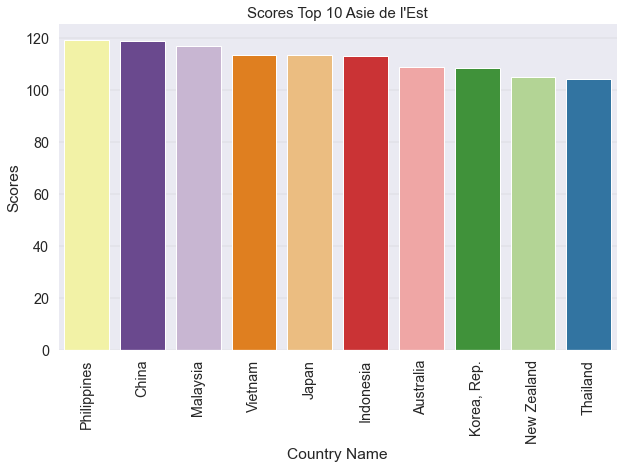

In [52]:
fig, axes = plt.subplots(figsize=[10,6]) 
plot_scores_pays(sorted_e_asia2016[:10], "Scores Top 10 Asie de l'Est")

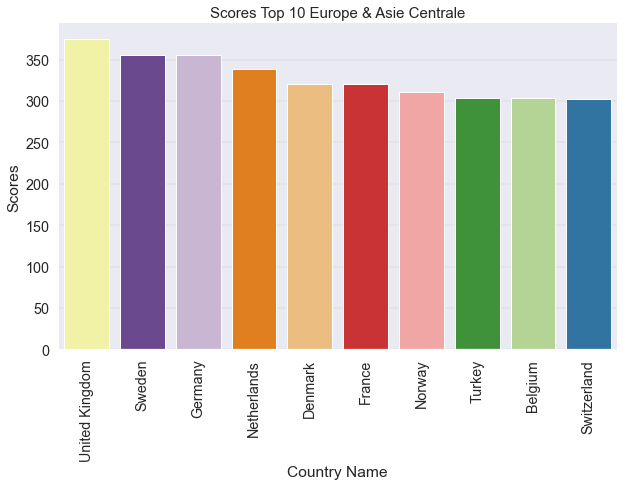

In [53]:
fig, axes = plt.subplots(figsize=[10,6]) 
plot_scores_pays(sorted_eur2016, "Scores Top 10 Europe & Asie Centrale")

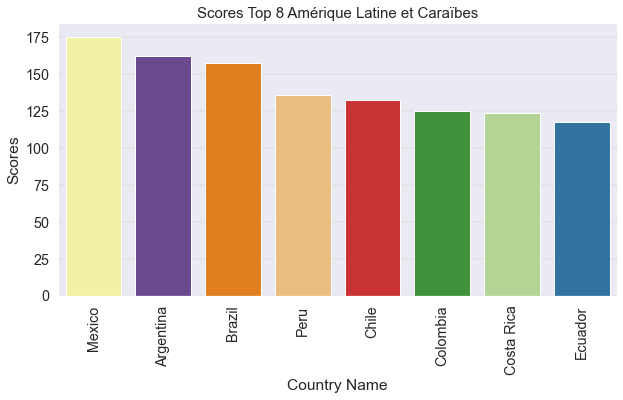

In [54]:
fig, axes = plt.subplots(figsize=[10,5]) 
plot_scores_pays(sorted_lat2016[:8], "Scores Top 8 Amérique Latine et Caraïbes")

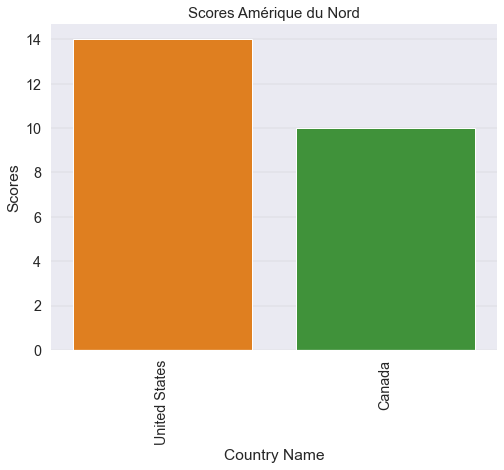

In [55]:
fig, axes = plt.subplots(figsize=[8,6]) 
plot_scores_pays(sorted_n_americ2016, "Scores Amérique du Nord")

In [56]:
def plot_scores_pays_world(dataframe, title_name):
    sns_plot = sns.barplot(data = dataframe[:10], x= "Country Name", y="Scores", palette="Paired_r", hue="Region")
    
    for item in sns_plot.get_xticklabels():
        item.set_rotation(90)
    
    sns_plot.spines['top'].set_visible(False)
    sns_plot.spines['right'].set_visible(False)
    sns_plot.spines['left'].set_visible(False)
    # supprimer y-axis tick marks
    sns_plot.yaxis.set_ticks_position('none')
    # rajouter major gridlines y-axis
    sns_plot.grid(color='grey', axis='y', linestyle='-', linewidth=0.25, alpha=0.5)
    sns.set(font_scale= 1.3)  
    sns_plot.set_title(title_name, fontsize = 15)
    plt.legend(loc='lower left')


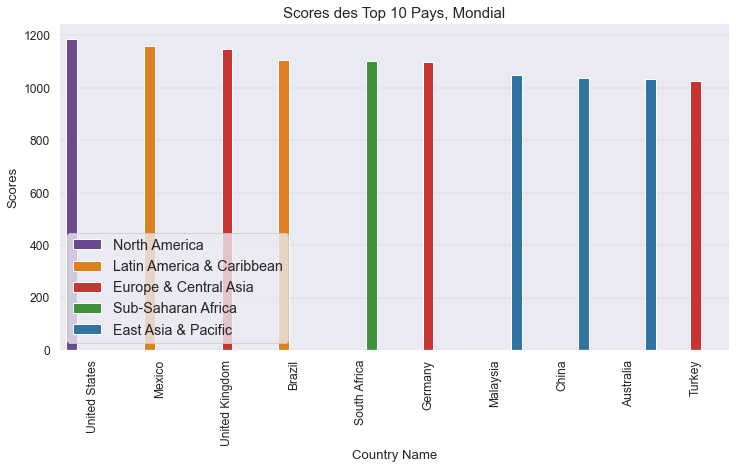

In [50]:
fig, axes = plt.subplots(figsize=[12,6]) 
plot_scores_pays_world(sorted_all2016, "Scores des Top 10 Pays, Mondial")


## Explications
On passe maintenant aux prédictions / evolution des pays avec un fort potentiel.

In [34]:
# fonction pour l'evolution de la population des pays
# on va prédire la population à partir des données des 2016

def prediction_pays(dataframe, name_csv, pow_year, year_end):

    data_evol = pd.DataFrame().reindex_like(dataframe)
    data_evol.iloc[:,0:2] = dataframe.iloc[:,0:2]

    growth_col = dataframe["Population growth (annual %)"].values
    
    data_evol["Population of the official age for primary education, both sexes (number)"] = dataframe["Population of the official age for primary education, both sexes (number)"] * ((1 + growth_col/100) ** pow_year)
    data_evol["Population of the official age for lower secondary education, both sexes (number)"] = dataframe["Population of the official age for lower secondary education, both sexes (number)"] * ((1 + growth_col/100) ** pow_year)
    data_evol["Enrolment in primary education, both sexes (number)"] = dataframe["Enrolment in primary education, both sexes (number)"] * ((1 + growth_col/100) ** pow_year)
    data_evol["Enrolment in secondary general, both sexes (number)"] = dataframe["Enrolment in secondary general, both sexes (number)"] * ((1 + growth_col/100) ** pow_year)
    
    data_evol["Region"] = dataframe["Region"]
    data_evol = data_evol.assign(Time = year_end)
    data_evol = data_evol.dropna(axis=1)
    # data_evol.to_csv('{}.csv'.format(name_csv))
    
    # evol_df.info()
    return data_evol


In [35]:
# pour chacun de ces pays, quelle sera l’évolution de ce potentiel de clients ? On calcule 
# l'évolution des indicateurs liés à la population 

sorted_all2025 =  prediction_pays(sorted_all2016, "All Evolution 2025", 9, "2025")

sorted_all2020 = prediction_pays(sorted_all2016, "All Evolution 2020", 4, "2020")


## Explications
Code pour au final avoir des graphiques qui comparent la population en 2016, 2020 et 2025

In [36]:
# on extrait les valeurs des indicateurs liés à la population pour le dataframe avec l'évolution
pop_cols = ["Country Name",
            "Population of the official age for primary education, both sexes (number)", 
            "Population of the official age for lower secondary education, both sexes (number)",
            "Enrolment in primary education, both sexes (number)",
            "Enrolment in secondary general, both sexes (number)",
            "Region"]

# avant l'évolution, pour les pays à fort potentiel
pop_all = sorted_all2016.loc[:9, pop_cols]
pop_ind_all = pop_all.assign(Time = "2016")


In [37]:
# on veut maintenant extraire de nos dataframes sur évolution, les pays à fort potentiel pour les comparer
evol_pays2 = pop_all["Country Name"].value_counts()
# liste des regions possible: regions_interest
pays_interest2 = list(evol_pays2.index)
print(pays_interest2)


sorted_countries2 = pd.concat([sorted_all2020, sorted_all2025])
# sorted_countries2.to_csv('sorted_countries2.csv')

fp_evolution_countries2 = sorted_countries2[sorted_countries2["Country Name"].isin(pays_interest2)]

# compare_evol contient toutes les données pour les 3 années: 2016 2020 2025
compare_evol2 = pd.concat([pop_ind_all, fp_evolution_countries2])
compare_evol2.to_csv('compare_evol2.csv')


['Turkey', 'Mexico', 'United States', 'Australia', 'South Africa', 'China', 'Germany', 'Brazil', 'United Kingdom', 'Malaysia']


In [38]:
# code pour avoir le potentiel de clients en 2016
croiss_all = sorted_all2016.loc[:9]
croiss_all["Population of the official age for lower secondary education, both sexes (number)"] *= 0.04

<ipython-input-38-41bde691dbb2>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  croiss_all["Population of the official age for lower secondary education, both sexes (number)"] *= 0.04


Text(0.5, 1.0, 'Comparaison du potentiel de clients en 2016 par pays (top 10 mondial)')

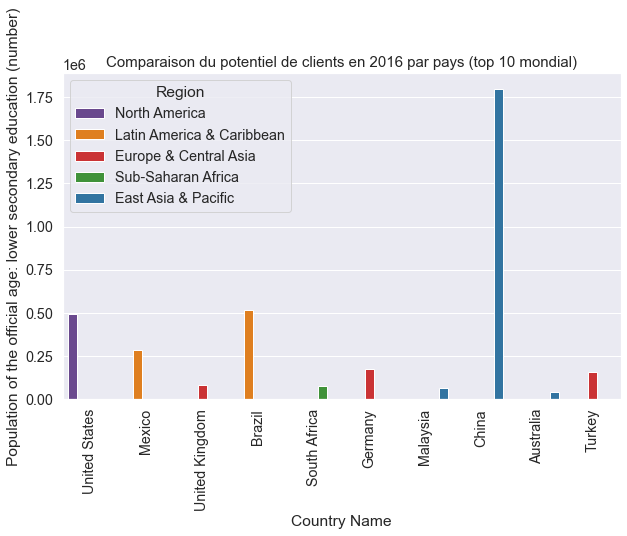

In [39]:
# graphique pour comparaison du potentiel de clients dans les top 10 pays 
fig, axes = plt.subplots(figsize=[10,6]) 

sns_plot = sns.barplot(data = croiss_all, x = "Country Name", 
                       y= "Population of the official age for lower secondary education, both sexes (number)", 
                       hue= "Region", palette="Paired_r")

for item in sns_plot.get_xticklabels():
        item.set_rotation(90)
        
sns.set(font_scale= 1.1)  
axes.set(ylabel="Population of the official age: lower secondary education (number)")
sns_plot.set_title("Comparaison du potentiel de clients en 2016 par pays (top 10 mondial)", fontsize = 15)


In [40]:
# code pour avoir un dataframe avec le taux de croissance démographique en 2016 des pays qui nous intéressent
croiss_top_cols = ["Country Name", "Population growth (annual %)", "Region"]

croiss_top = sorted_all2016.loc[:9, croiss_top_cols]

list_taux = ['China', 'Brazil', 'United States', 'Mexico']
taux_list = croiss_top[croiss_top["Country Name"].isin(list_taux)]


Text(0.5, 1.0, 'Taux de croissance démographique (% annuel)')

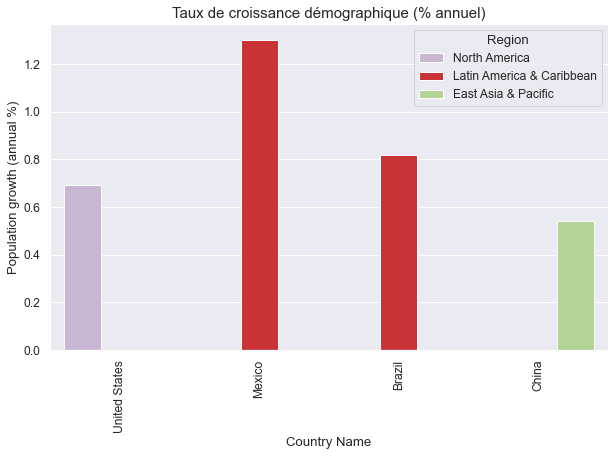

In [41]:
# graphique pour la croissance démographique
fig, axes = plt.subplots(figsize=[10,6]) 

sns_plot = sns.barplot(data = taux_list, x = "Country Name", y= "Population growth (annual %)", 
                       hue= "Region", palette="Paired_r")

for item in sns_plot.get_xticklabels():
        item.set_rotation(90)
        
sns.set(font_scale= 1.3)  
sns_plot.set_title("Taux de croissance démographique (% annuel)", fontsize = 15)
        

In [42]:
def clients_pays(dataframe, name_csv):

    client_count = pd.DataFrame().reindex_like(dataframe)
    client_count.iloc[:,0:1] = dataframe.iloc[:,0:1]
    
    client_count["Population of the official age for primary education, both sexes (number)"] = dataframe["Population of the official age for primary education, both sexes (number)"] * (0.04)
    client_count["Population of the official age for lower secondary education, both sexes (number)"] = dataframe["Population of the official age for lower secondary education, both sexes (number)"] * (0.04)
    client_count["Enrolment in primary education, both sexes (number)"] = dataframe["Enrolment in primary education, both sexes (number)"] * (0.04)
    client_count["Enrolment in secondary general, both sexes (number)"] = dataframe["Enrolment in secondary general, both sexes (number)"] * (0.04)
    
    client_count["Region"] = dataframe["Region"]
    client_count["Time"] = dataframe["Time"]
    client_count = client_count.dropna(axis=1)
    client_count.to_csv('{}.csv'.format(name_csv))

    return client_count


In [43]:
# code pour avoir le potentiel de clients dans le top 4 des pays 
list_c1 = ['China', 'Brazil', 'United States']
list_c2 = ['Brazil', 'United States']
list_c3 = ['China','Brazil', 'United States', 'Mexico']

# compare_evol2 contient toutes les données pour Time: 2016 2020 2025
compare_1 = compare_evol2[compare_evol2["Country Name"].isin(list_c1)]
compare_2 = compare_evol2[compare_evol2["Country Name"].isin(list_c2)]
compare_3 = compare_evol2[compare_evol2["Country Name"].isin(list_c3)]

client_count = clients_pays(compare_3, "Compare Evol Clients")

# code pour print les estimations du potentiel de clients dans les 4 top pays, en 2016, 2020 et 2025
pop2016 = client_count[client_count["Time"]=="2016"]
pop2020 = client_count[client_count["Time"]=="2020"]
pop2025 = client_count[client_count["Time"]=="2025"]

tot2016 = pop2016["Population of the official age for lower secondary education, both sexes (number)"].sum().round(-3)
tot2020 = pop2020["Population of the official age for lower secondary education, both sexes (number)"].sum().round(-3)
tot2025 = pop2025["Population of the official age for lower secondary education, both sexes (number)"].sum().round(-3)
print("Potentiel de clients:", tot2016, tot2020, tot2025)


Potentiel de clients: 3097000.0 3182000.0 3293000.0


Text(0.5, 1.0, 'Comparaison du potentiel de clients')

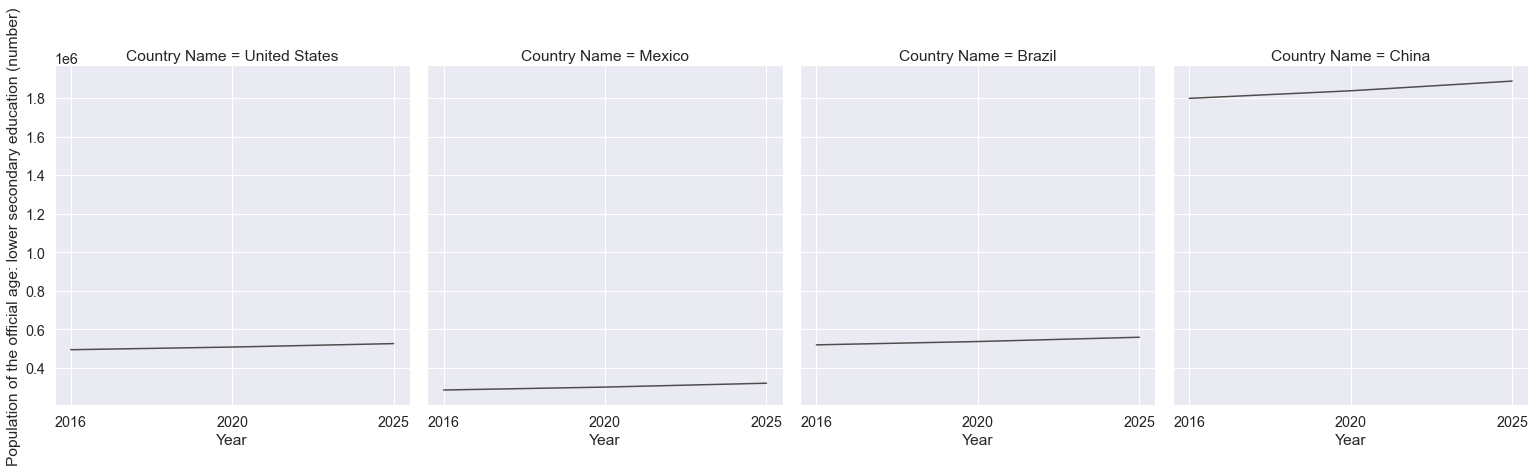

In [44]:

# graphiques pour comparer l'evolution du potentiel de la population
g = sns.FacetGrid(client_count, height = 6, aspect = 0.9, col="Country Name", hue= "Region")
g.map(sns.lineplot, "Time", 
      "Population of the official age for lower secondary education, both sexes (number)",  
      color=".3")
g.set_ylabels("Population of the official age: lower secondary education (number)", rotation=90)
g.set_xlabels("Year")

sns.set(font_scale= 1.2)  
sns_plot.set_title("Comparaison du potentiel de clients", fontsize = 15)


In [45]:
def plot_evolution(y_value, country, plot_title): 
    
    data_c = client_count[client_count["Country Name"] == country]
    
    sns_plot = sns.lineplot(data = data_c, x= "Time", y = y_value, palette="Paired")
    
    for item in sns_plot.get_xticklabels():
        item.set_rotation(90)
    
    sns_plot.spines['top'].set_visible(False)
    sns_plot.spines['right'].set_visible(False)
    sns_plot.spines['left'].set_visible(False)
    # supprimer y-axis tick marks
    sns_plot.yaxis.set_ticks_position('none')
    # rajouter major gridlines y-axis
    sns_plot.grid(color='grey', axis='y', linestyle='-', linewidth=0.25, alpha=0.5)
    sns.set(font_scale= 1.1)  
    sns_plot.set_title(plot_title, fontsize = 15)
    plt.xlabel("Time")


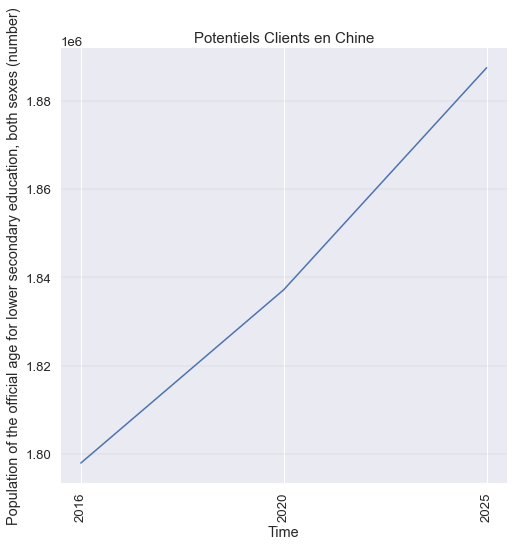

In [46]:
fig, axes = plt.subplots(figsize=[8,8]) 
plot_evolution("Population of the official age for lower secondary education, both sexes (number)",
               "China", "Potentiels Clients en Chine")

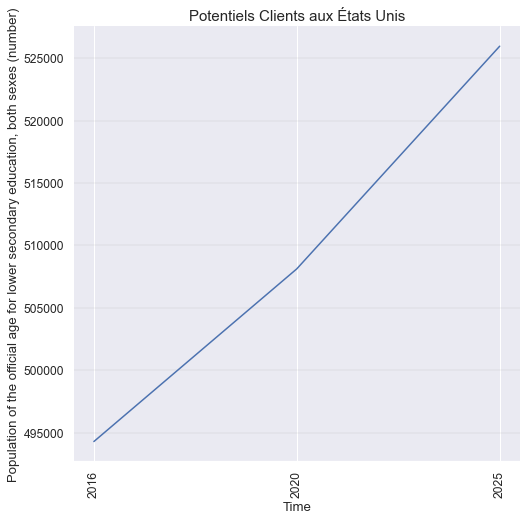

In [47]:
fig, axes = plt.subplots(figsize=[8,8]) 
plot_evolution("Population of the official age for lower secondary education, both sexes (number)",
               "United States", "Potentiels Clients aux États Unis")

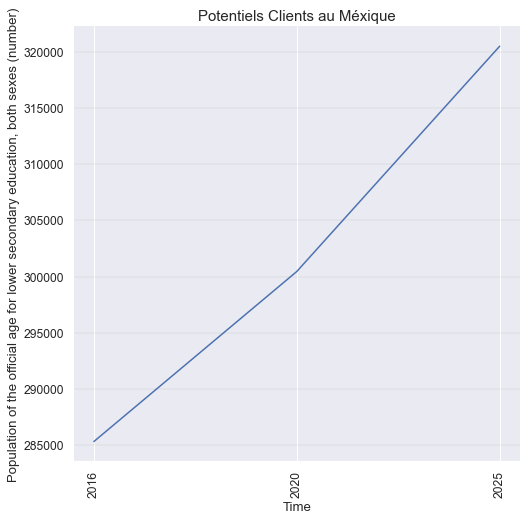

In [48]:
fig, axes = plt.subplots(figsize=[8,8]) 
plot_evolution("Population of the official age for lower secondary education, both sexes (number)",
               "Mexico", "Potentiels Clients au Méxique")